In [1]:
import keras
from keras import Model
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def preprocess_data():
    n_out=10

    (x_train,y_train),(x_test,y_test)=mnist.load_data()

    x_train=x_train/255.
    x_test=x_test/255.

    #one-hot encoding
    y_train = keras.utils.np_utils.to_categorical(y_train, n_out)
    y_test = keras.utils.np_utils.to_categorical(y_test, n_out)

    x_train = np.expand_dims(x_train, axis=3)
    x_test = np.expand_dims(x_test, axis=3)

    #print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)
    
    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test=preprocess_data()

In [19]:
cnn=Sequential()
    
cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
#cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
#cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
#cnn.add(MaxPooling2D((2,2)))

cnn.add(Flatten())
cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(10,activation='softmax'))                   
cnn.summary()

cnn.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['categorical_accuracy'])

traj=cnn.fit(x_train,y_train,epochs=20,batch_size=32,
             verbose=1,shuffle=True,validation_data=(x_test, y_test))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 32)                73760     
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                      

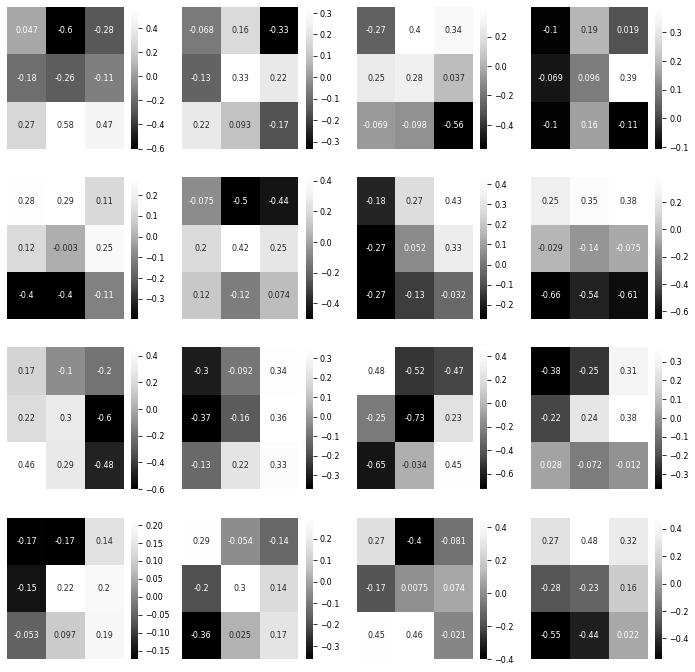

In [9]:
def show_weights_16_layer1(model,layer=0):

    plt.rcParams['font.size']='8'

    plt.figure(figsize=(12,12))
    w,b=model.layers[layer].get_weights()
    for i in range(16):
        plt.subplot(4,4,i+1)
        sns.heatmap(w[:,:,0,i],cmap='Greys_r',annot=True)
        plt.xticks([])
        plt.yticks([])
    
show_weights_16_layer1(cnn,layer=0)

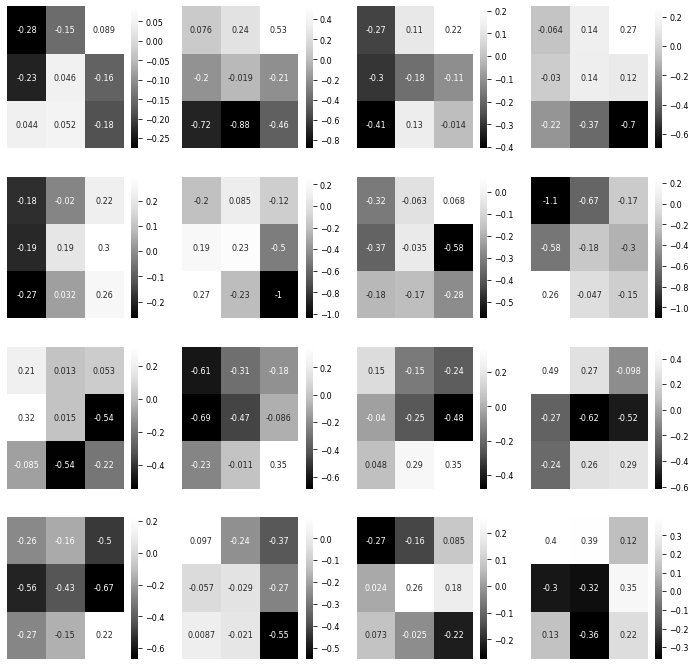

In [10]:
show_weights_16_layer1(cnn,layer=1)

In [11]:
cnn.layers

In [14]:
def get_layer_model(cnn,layer=1):

    outputs = [cnn.layers[i].output for i in range(layer)]
    l = Model(inputs=cnn.inputs, outputs=outputs)
    #l.summary()
    
    return l

def show_featuremap_16_layer(model,x,layer=1):

    l1=get_layer_model(model,layer=layer)
    if layer==1:
        lout=l1.predict(np.expand_dims(x,axis=0))
    else:
        lout=l1.predict(np.expand_dims(x,axis=0))
        lout=lout[-1]
        
    plt.figure(figsize=(12,12))
    for i in range(16):
        plt.subplot(4,4,i+1)
        sns.heatmap(lout[0,:,:,i],cmap='Greys_r',annot=False)
        plt.xticks([])
        plt.yticks([])

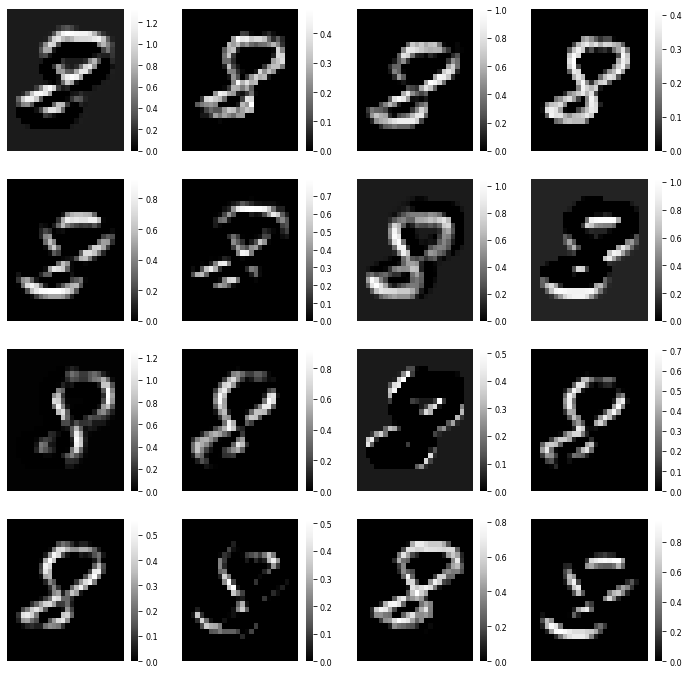

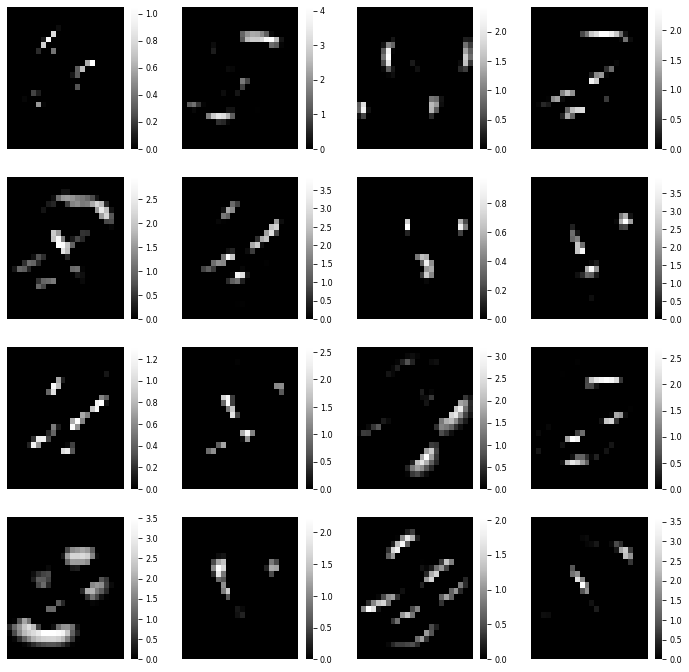

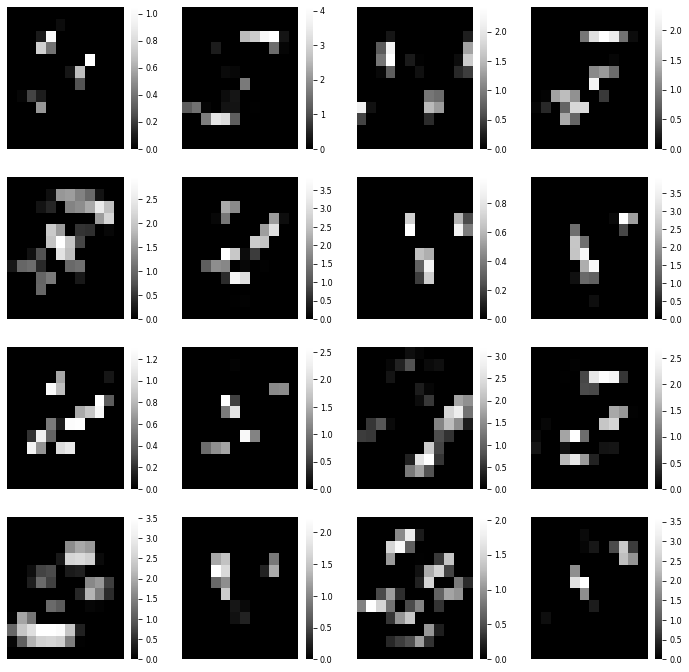

In [17]:
show_featuremap_16_layer(cnn,x_test[61,:,:,:],layer=1)
show_featuremap_16_layer(cnn,x_test[61,:,:,:],layer=2)
show_featuremap_16_layer(cnn,x_test[61,:,:,:],layer=3)

In [20]:
cnn=Sequential()
    
cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Flatten())
cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(10,activation='softmax'))                   
cnn.summary()

cnn.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['categorical_accuracy'])

traj=cnn.fit(x_train,y_train,epochs=20,batch_size=32,verbose=1,shuffle=True,validation_data=(x_test, y_test))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 16)        2320      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                  

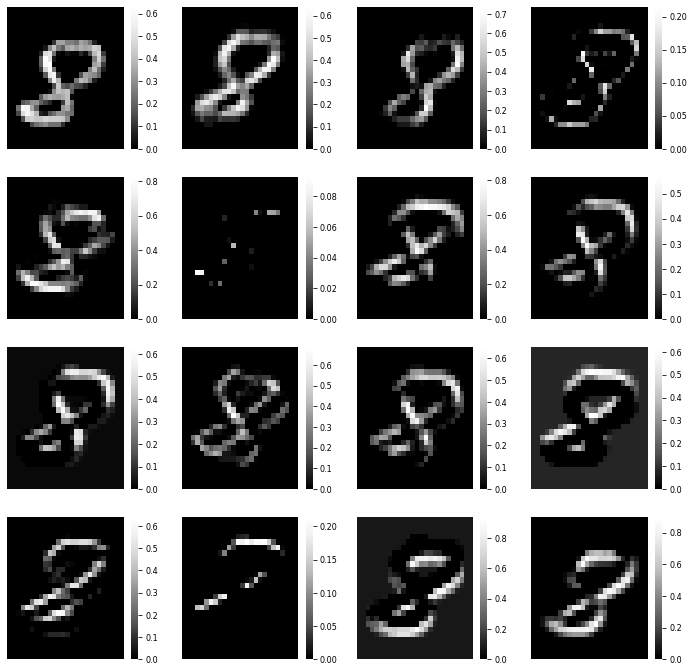

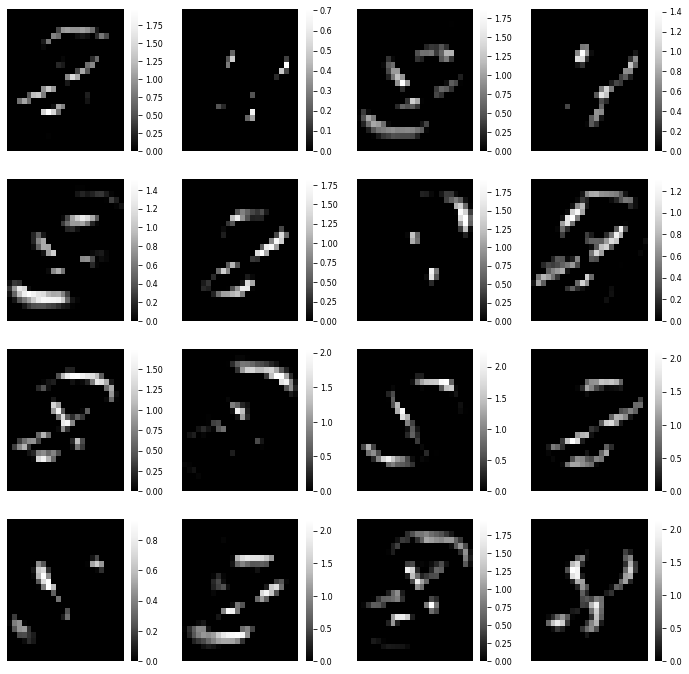

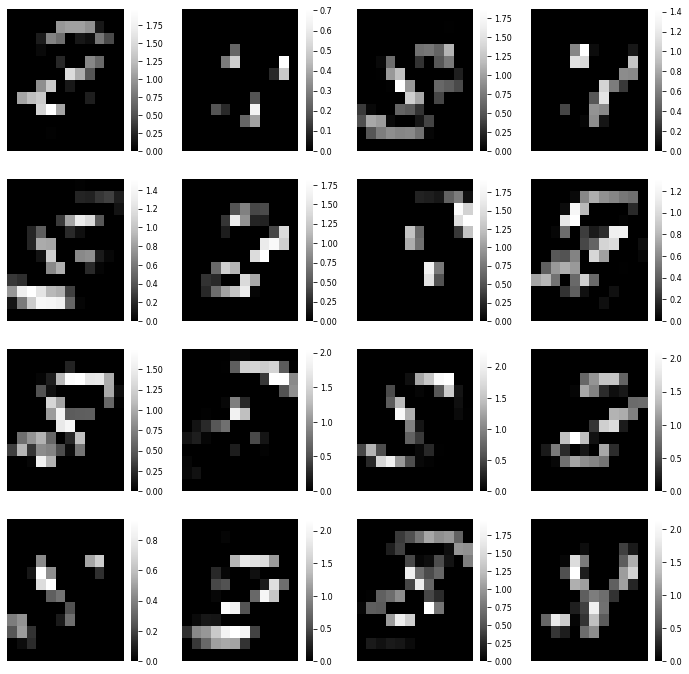

In [21]:
show_featuremap_16_layer(cnn,x_test[61,:,:,:],layer=1)
show_featuremap_16_layer(cnn,x_test[61,:,:,:],layer=2)
show_featuremap_16_layer(cnn,x_test[61,:,:,:],layer=3)

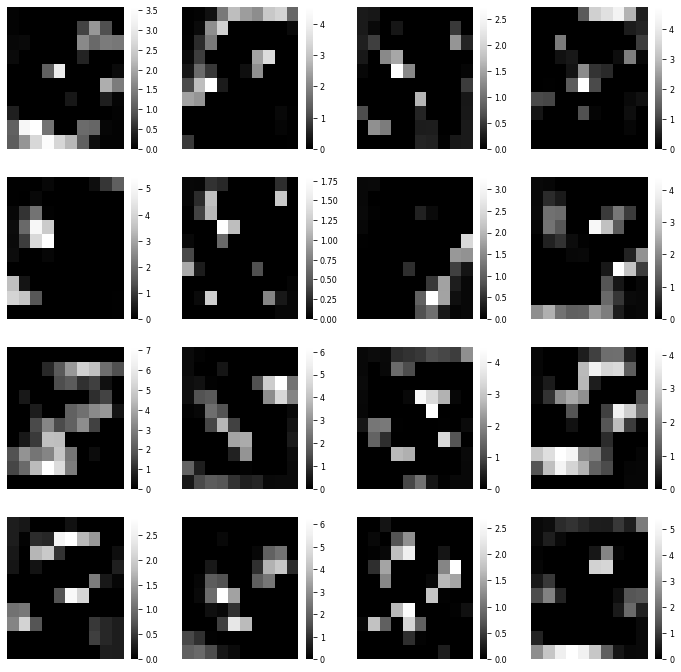

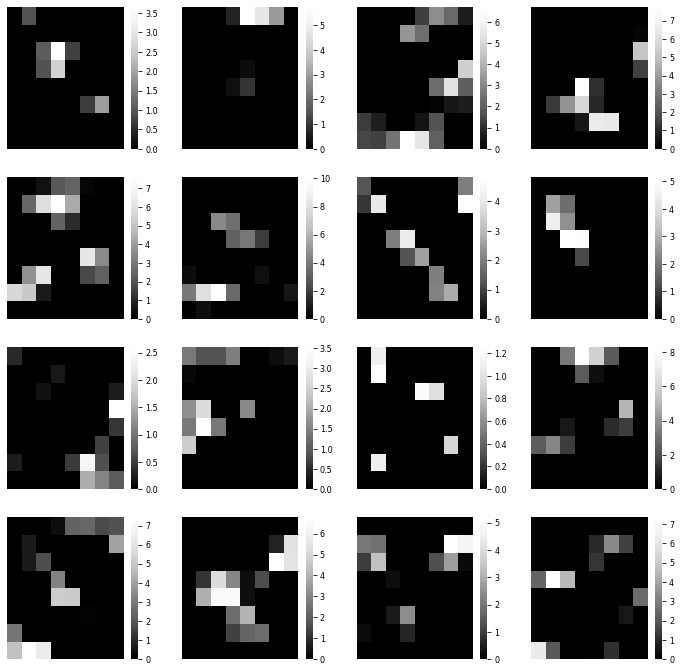

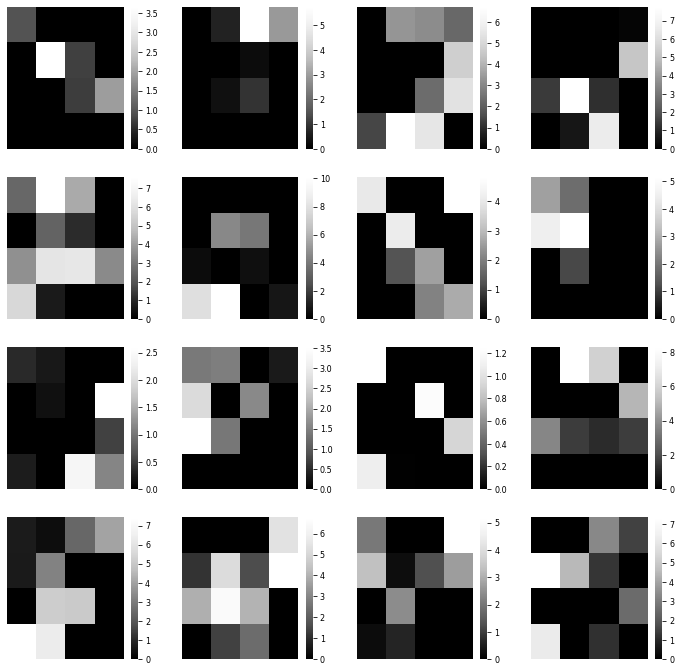

In [22]:
show_featuremap_16_layer(cnn,x_test[61,:,:,:],layer=4)
show_featuremap_16_layer(cnn,x_test[61,:,:,:],layer=5)
show_featuremap_16_layer(cnn,x_test[61,:,:,:],layer=6)

In [23]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 16)        2320      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                  

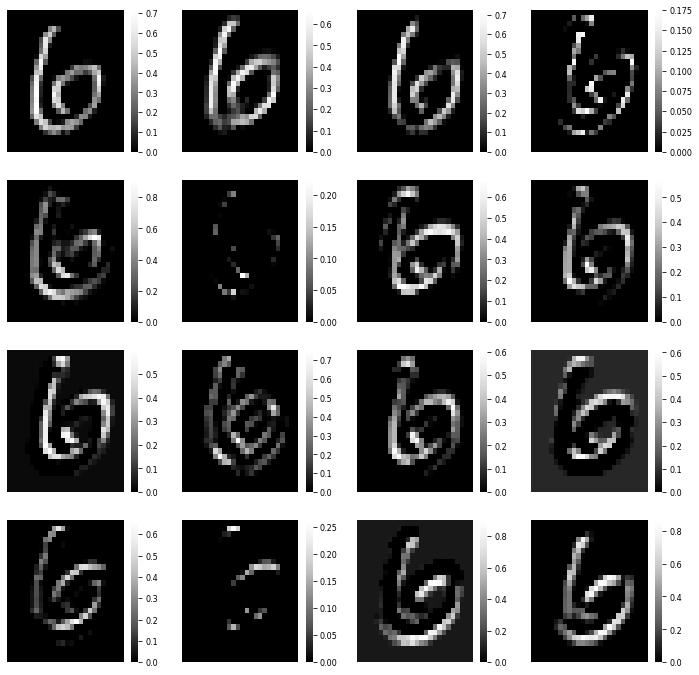

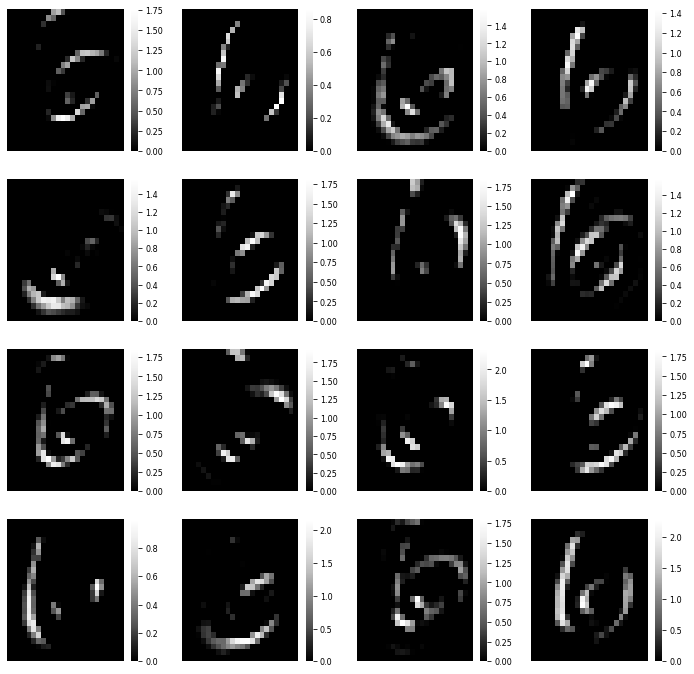

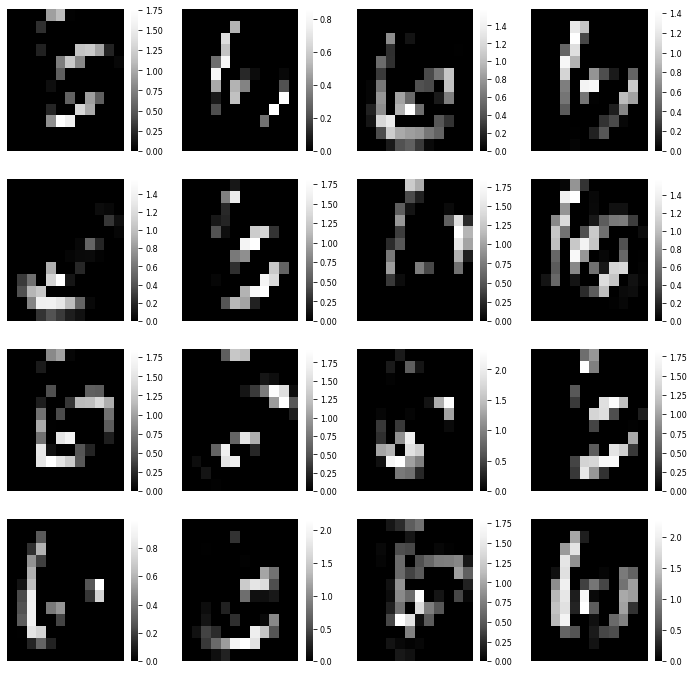

In [24]:
show_featuremap_16_layer(cnn,x_test[11,:,:,:],layer=1)
show_featuremap_16_layer(cnn,x_test[11,:,:,:],layer=2)
show_featuremap_16_layer(cnn,x_test[11,:,:,:],layer=3)

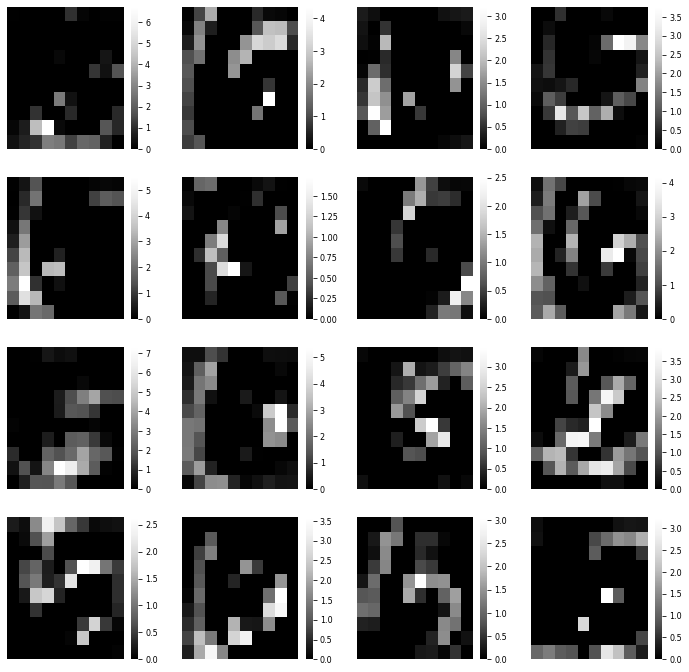

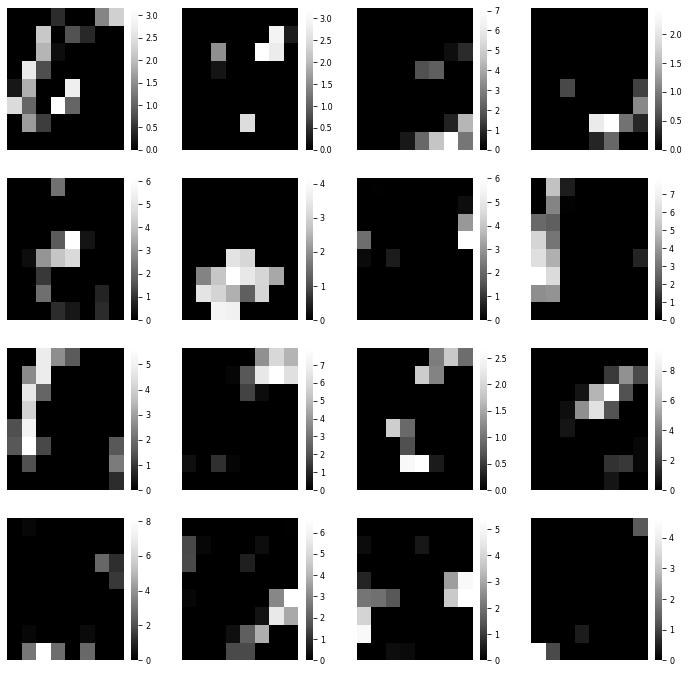

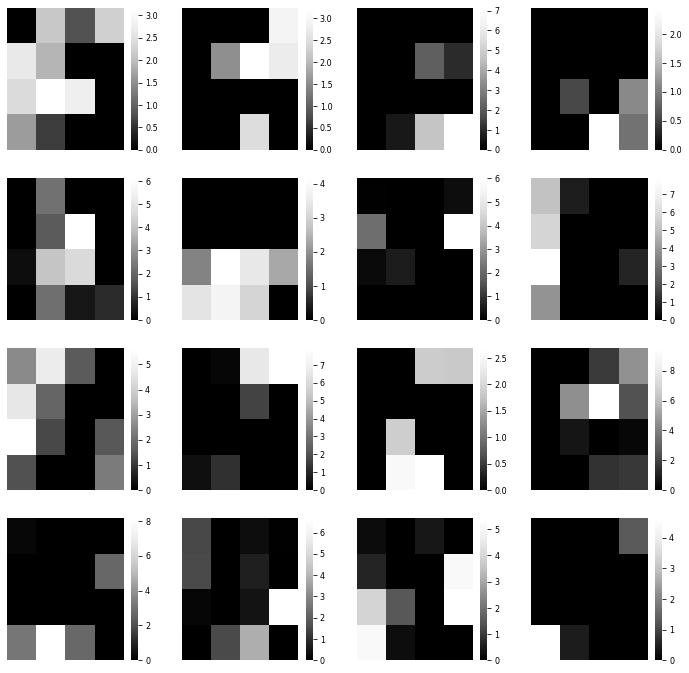

In [25]:
show_featuremap_16_layer(cnn,x_test[11,:,:,:],layer=4)
show_featuremap_16_layer(cnn,x_test[11,:,:,:],layer=5)
show_featuremap_16_layer(cnn,x_test[11,:,:,:],layer=6)

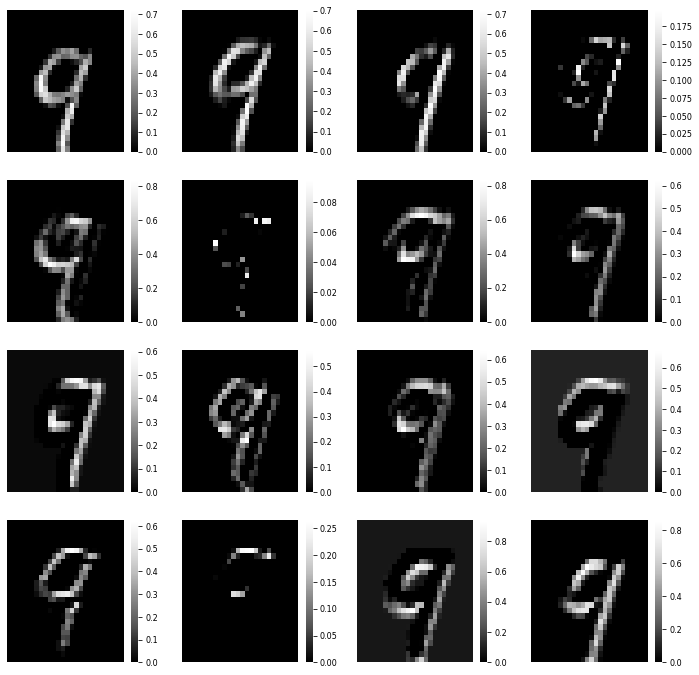

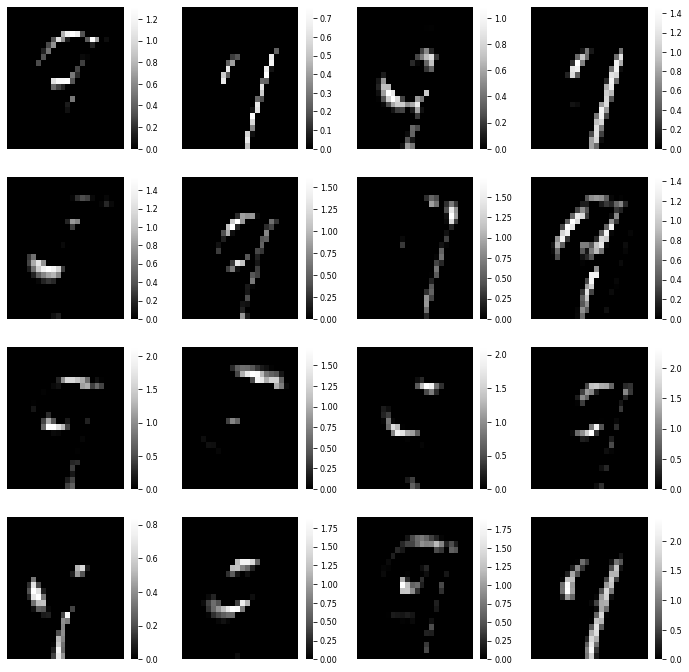

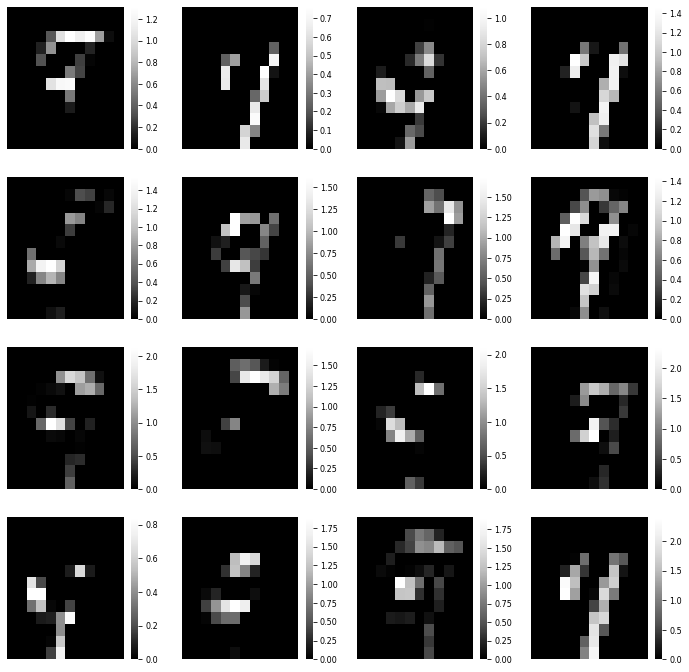

In [26]:
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=1)
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=2)
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=3)

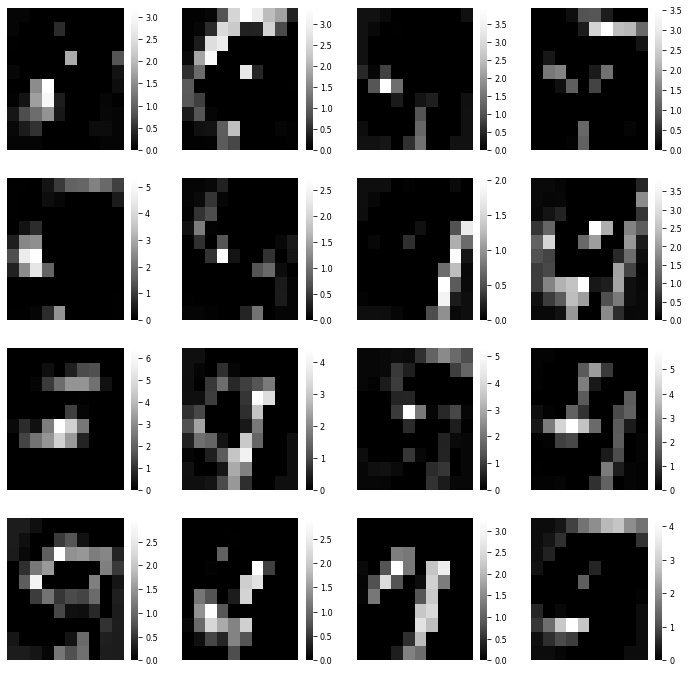

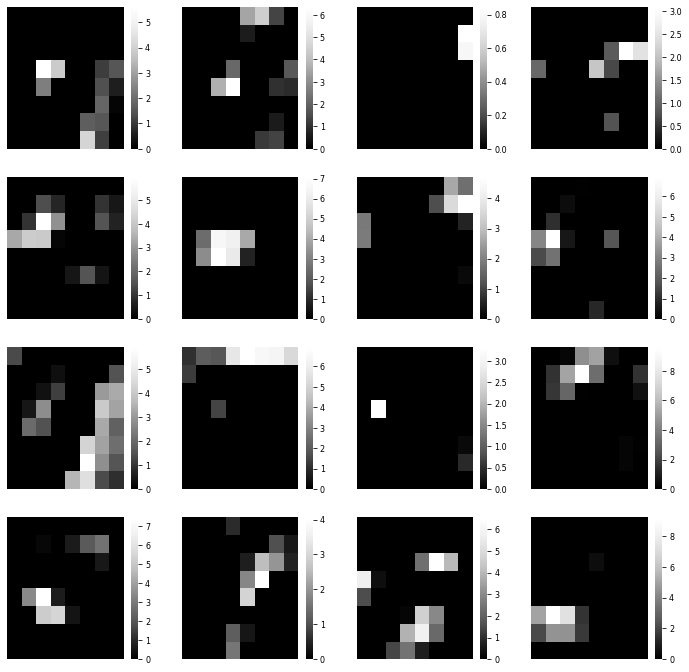

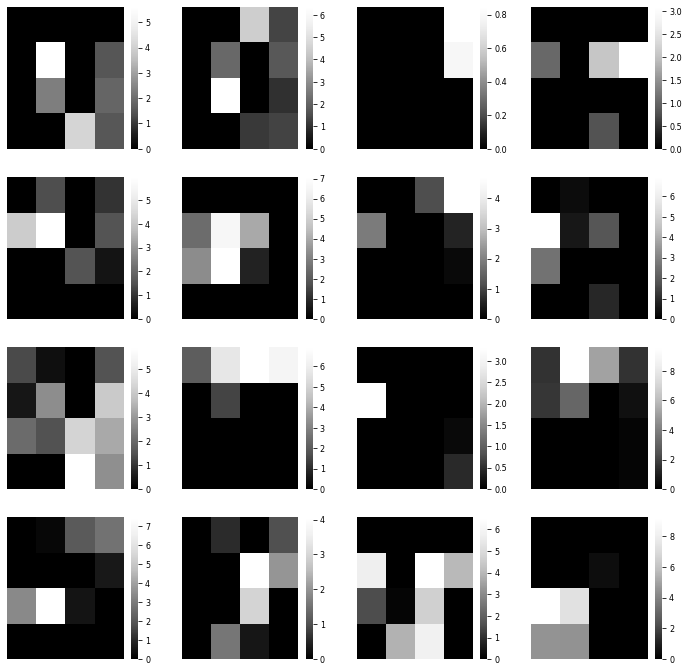

In [28]:
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=4)
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=5)
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=6)

In [38]:
cnn=Sequential()
    
cnn.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
cnn.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
#cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
#cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
#cnn.add(MaxPooling2D((2,2)))

cnn.add(Flatten())
cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(10,activation='softmax'))                   
cnn.summary()

cnn.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['categorical_accuracy'])

traj=cnn.fit(x_train,y_train,epochs=20,batch_size=32,verbose=1,shuffle=True,validation_data=(x_test, y_test))


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_38 (Conv2D)          (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 10, 10, 8)         584       
                                                                 
 conv2d_40 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 8)          0         
 g2D)                                                

KeyboardInterrupt: 

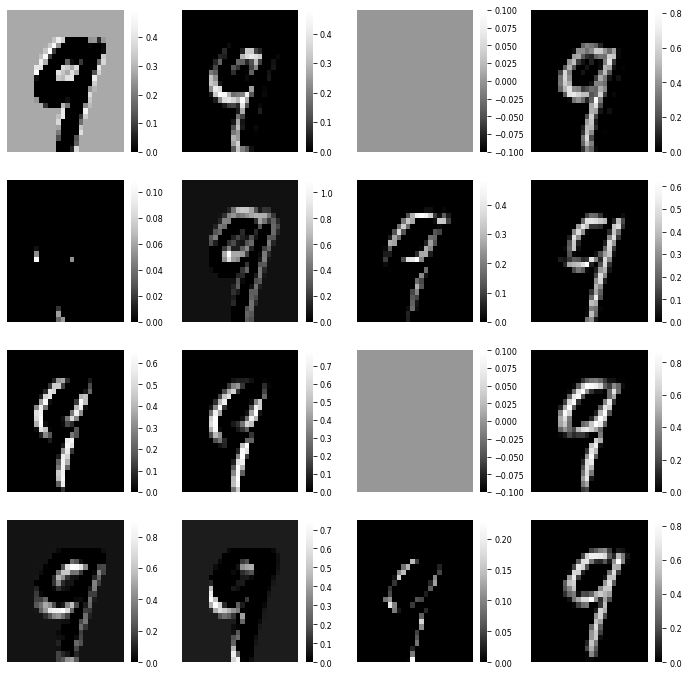

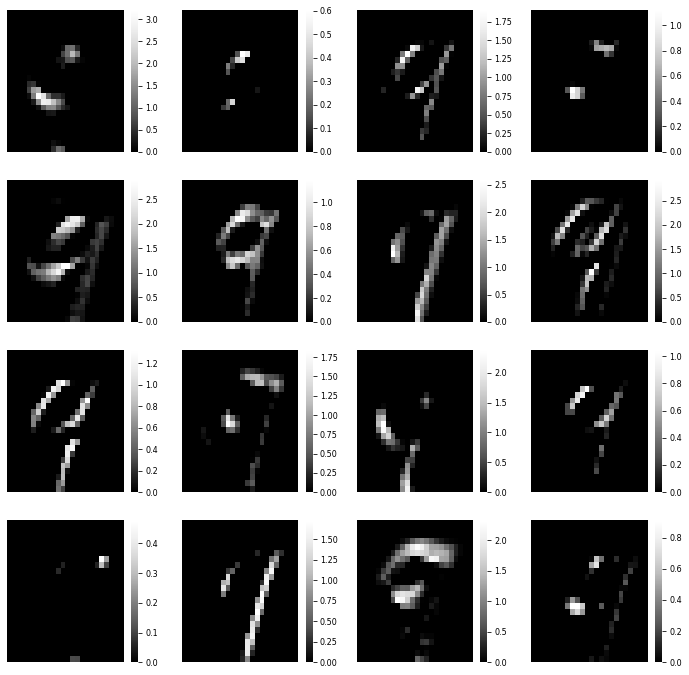

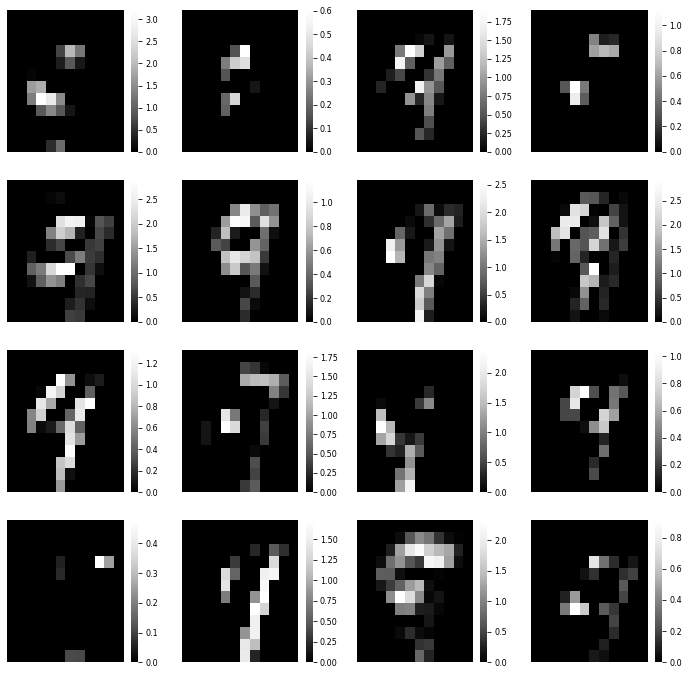

In [37]:
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=1)
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=2)
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=3)

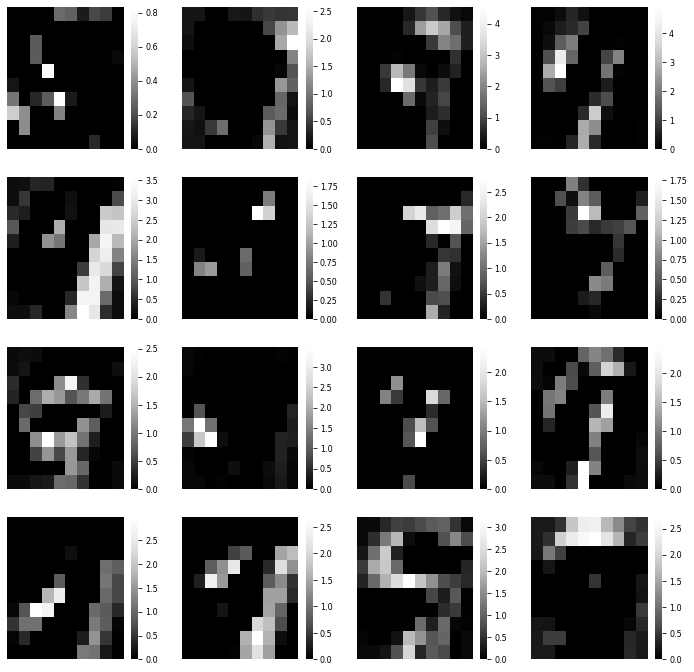

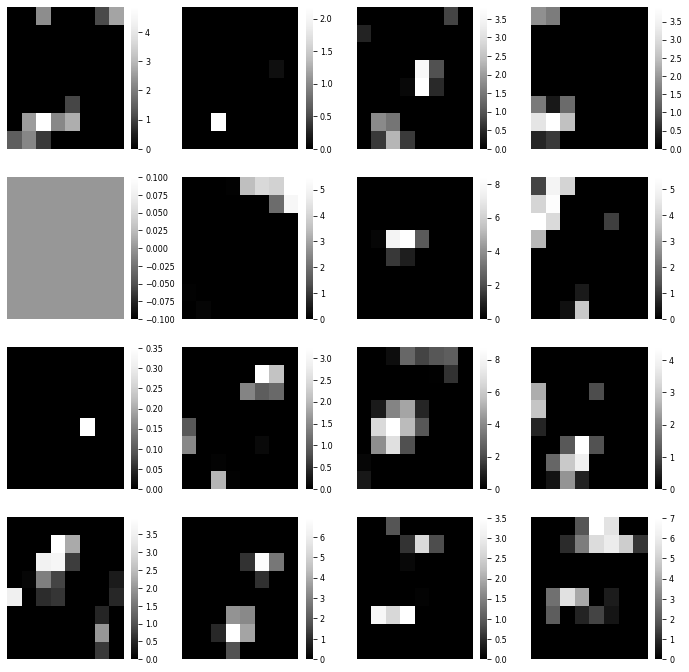

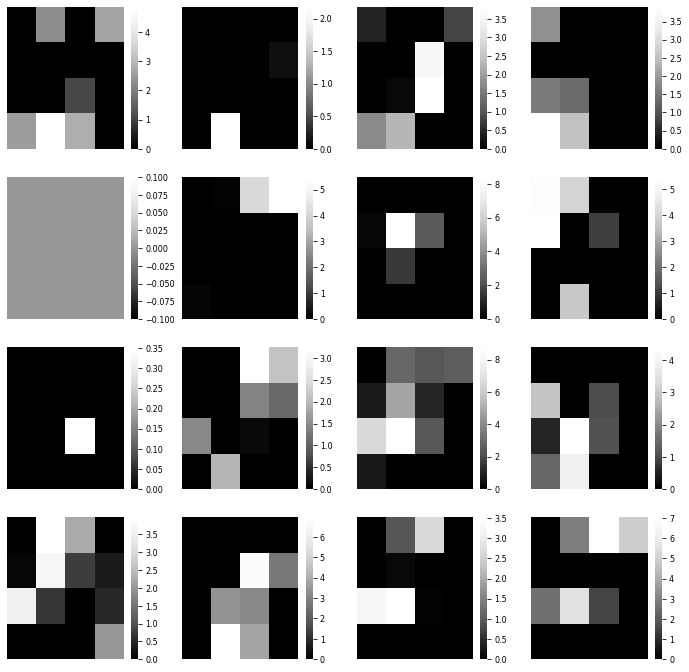

In [31]:
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=4)
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=5)
show_featuremap_16_layer(cnn,x_test[12,:,:,:],layer=6)

In [39]:
def train_filter(n_f=8):

    cnn=Sequential()

    cnn.add(Conv2D(filters=n_f,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
    cnn.add(Conv2D(filters=n_f,kernel_size=(3,3),activation='relu'))
    cnn.add(MaxPooling2D((2,2)))
    cnn.add(Conv2D(filters=n_f,kernel_size=(3,3),activation='relu'))
    cnn.add(Conv2D(filters=n_f,kernel_size=(3,3),activation='relu'))
    cnn.add(MaxPooling2D((2,2)))
    #cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
    #cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
    #cnn.add(MaxPooling2D((2,2)))

    cnn.add(Flatten())
    cnn.add(Dense(32,activation='relu'))
    cnn.add(Dense(10,activation='softmax'))                   
    cnn.summary()

    cnn.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['categorical_accuracy'])

    traj=cnn.fit(x_train,y_train,epochs=20,batch_size=32,verbose=1,shuffle=True,validation_data=(x_test, y_test))
    
    return traj,cnn


trajs={}
models={}
for n_f in [4,8,16,32]:
    
    trajs[n_f],models[n_f]=train_filter(n_f=n_f)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 26, 26, 4)         40        
                                                                 
 conv2d_42 (Conv2D)          (None, 24, 24, 4)         148       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 10, 10, 4)         148       
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 4)           148       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 4)          0         
 g2D)                                                

In [40]:
n_f=64
trajs[n_f],models[n_f]=train_filter(n_f=n_f)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_58 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 conv2d_60 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                

In [43]:
cnn2=Sequential()
cnn2.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
cnn2.add(MaxPooling2D((2,2)))
cnn2.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
cnn2.add(MaxPooling2D((2,2)))
cnn2.add(Flatten())
cnn2.add(Dense(32,activation='relu'))
cnn2.add(Dense(10,activation='softmax'))                   
cnn2.summary()

cnn2.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['categorical_accuracy'])

traj2=cnn2.fit(x_train,y_train,epochs=20,batch_size=32,verbose=1,
               shuffle=True,validation_data=(x_test, y_test))


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 400)               0         
                                                                 
 dense_34 (Dense)            (None, 32)              

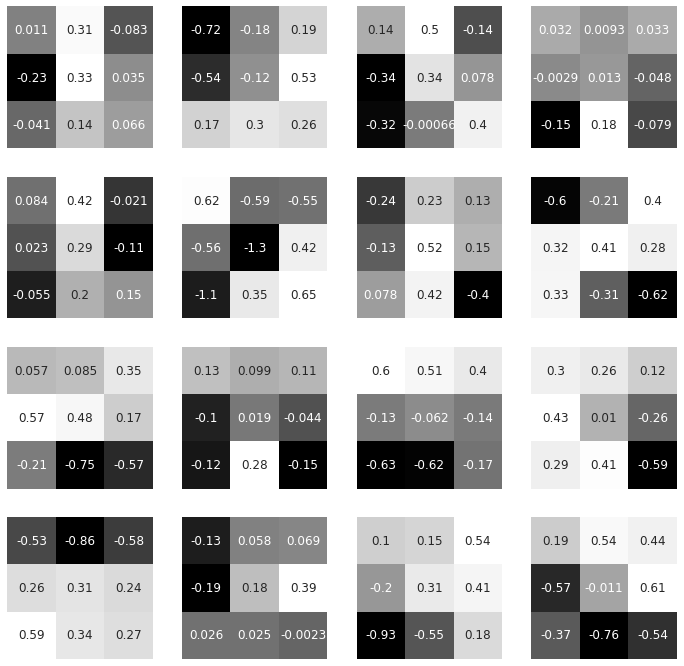

In [48]:
def show_weights_16_layer1(model,layer=0):

    plt.rcParams['font.size']='12'

    plt.figure(figsize=(12,12))
    w,b=model.layers[layer].get_weights()
    for i in range(16):
        plt.subplot(4,4,i+1)
        sns.heatmap(w[:,:,0,i],cmap='Greys_r',annot=True,cbar=False)
        plt.xticks([])
        plt.yticks([])
    
    plt.savefig('cnn_mnist_layer'+str(layer)+'.png',dpi=350)
    
show_weights_16_layer1(cnn2,layer=0)

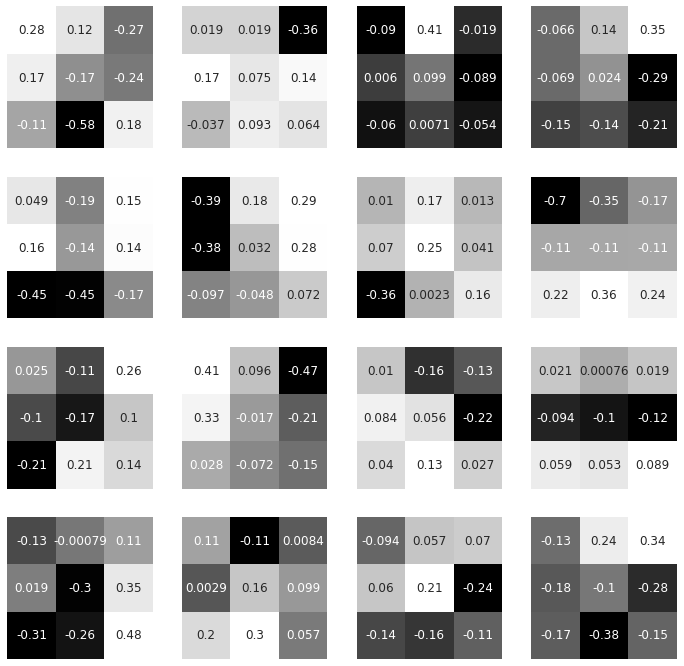

In [49]:
show_weights_16_layer1(cnn2,layer=2)

RecursionError: maximum recursion depth exceeded while calling a Python object

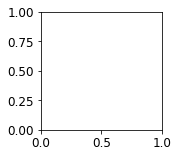

In [65]:
from keras import backend as K
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def show_filter(model, layer_name='conv2d_63', filter_idx=0):

    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_idx])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])

    #loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
    input_img_data = np.random.random((1, 28, 28, 1)) * 20 + 128.
    step=1.
    # run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    
    img=input_img_data[0]
    
    return deprocess_image(img)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(show_filter(cnn2,layer_name='conv2d_63', filter_idx=i))
    plt.xticks([])
    plt.yticks([])

In [50]:
cnn2.layers

In [51]:
layer_dict = dict([(layer.name, layer) for layer in cnn2.layers])

In [52]:
layer_dict

{'conv2d_63': <keras.layers.convolutional.Conv2D at 0x28ef2ae20>,
 'max_pooling2d_34': <keras.layers.pooling.MaxPooling2D at 0x28f931dc0>,
 'conv2d_64': <keras.layers.convolutional.Conv2D at 0x28f902af0>,
 'max_pooling2d_35': <keras.layers.pooling.MaxPooling2D at 0x28f9e0610>,
 'flatten_17': <keras.layers.core.flatten.Flatten at 0x28ef28640>,
 'dense_34': <keras.layers.core.dense.Dense at 0x28fa5ebe0>,
 'dense_35': <keras.layers.core.dense.Dense at 0x28f902d00>}

In [56]:
layer_output = cnn2.get_layer('conv2d_63').output

In [63]:
layer_output[]

<KerasTensor: shape=(None, 26, 26, 16) dtype=float32 (created by layer 'conv2d_63')>

In [71]:
import sys

model2=cnn2
#sys.setrecursionlimit(10000) 
layer_output = cnn2.get_layer('conv2d_63').output
loss = K.mean(layer_output[:, :,:, 0],axis=None,keepdims=False)
#grads = K.gradients(loss, model.input)[0]
#grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
#iterate = K.function([model.input], [loss, grads])

#loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
#input_img_data = np.random.random((1, 28, 28, 1)) * 20 + 128.
#step=1.
# run gradient ascent for 20 steps
#for i in range(20):
#    loss_value, grads_value = iterate([input_img_data])
#    input_img_data += grads_value * step

#img=input_img_data[0]

#    return deprocess_image(img)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [70]:
layer_output

<KerasTensor: shape=(None, 26, 26, 16) dtype=float32 (created by layer 'conv2d_63')>

In [141]:
cnn4=Sequential()
cnn4.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
#cnn.add(Conv2D(filters=n_f,kernel_size=(3,3),activation='relu'))
cnn4.add(MaxPooling2D((2,2)))
cnn4.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
#cnn.add(Conv2D(filters=n_f,kernel_size=(3,3),activation='relu'))
cnn4.add(MaxPooling2D((2,2)))
#cnn3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
#cnn.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
#cnn3.add(MaxPooling2D((2,2)))

cnn4.add(Flatten())
cnn4.add(Dense(32,activation='relu'))
cnn4.add(Dense(10,activation='softmax'))                   
cnn4.summary()

cnn4.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['categorical_accuracy'])

traj4=cnn4.fit(x_train,y_train,epochs=10,batch_size=32,verbose=1,shuffle=True,validation_data=(x_test, y_test))
    

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 400)               0         
                                                                 
 dense_40 (Dense)            (None, 32)              

In [142]:
layer_outputs = [layer.output for layer in cnn4.layers[0:5]]
activation_model = Model(inputs=cnn4.input,outputs=layer_outputs)
activations = activation_model.predict(np.expand_dims(x_test[51,:,:,:], axis=0))
activation_model.summary()

Model: "model_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_70 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                          

In [134]:
layer_outputs = [layer.output for layer in cnn3.layers[0:7]]
activation_model = Model(inputs=cnn3.input,outputs=layer_outputs)
activations = activation_model.predict(np.expand_dims(x_test[51,:,:,:], axis=0))
activation_model.summary()

Model: "model_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_65 (Conv2D)          (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 11, 11, 48)        10416     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 48)         0         
 g2D)                                                            
                                                          

In [139]:
layer_outputs = [layer.output for layer in cnn2.layers[0:5]]
activation_model = Model(inputs=cnn2.input,outputs=layer_outputs)
activations = activation_model.predict(np.expand_dims(x_test[51,:,:,:], axis=0))
activation_model.summary()

TypeError: Can not convert a KerasTensor into a Tensor or Operation.

In [77]:
activation_model

In [128]:
img=x_test[51,:,:,0]
plt.imshow(img)

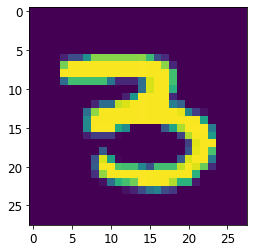

In [81]:
plt.imshow(img)

In [133]:
activations = activation_model.predict(np.expand_dims(x_test[51,:,:,:], axis=0))
activation_model.summary()

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_65 (Conv2D)          (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 11, 11, 48)        10416     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 48)         0         
 g2D)                                                            
                                                          

In [97]:
activations[4].shape

(1, 1, 1, 64)

In [86]:
x_test.shape

(10000, 28, 28, 1)

In [91]:
cnn3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 11, 11, 48)        10416     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 48)         0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 3, 3, 64)          27712     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 1, 1, 64)       

In [99]:
layer_names = []
for layer in cnn3.layers[1:7]:
    layer_names.append(layer.name)

24
13
48
11
48
5
64
3
64
1
64
64


/var/folders/89/wkwstz_d4zq1pshpw71z9wb80000gp/T/ipykernel_83430/2254409023.py:13: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

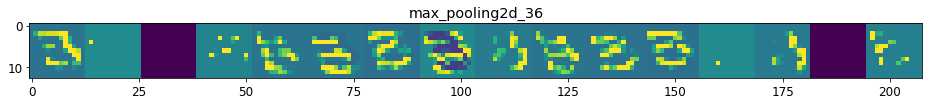

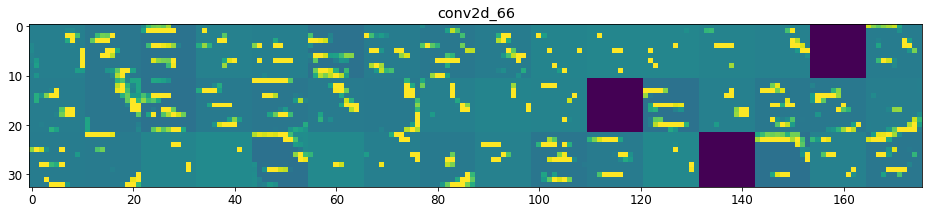

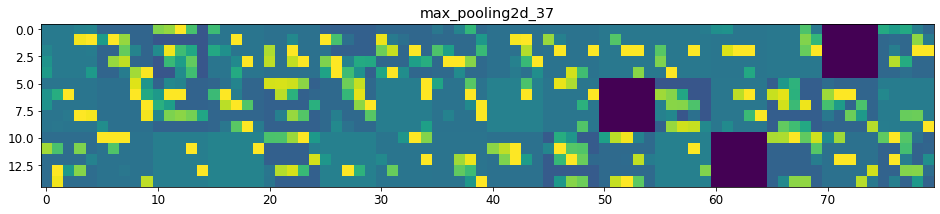

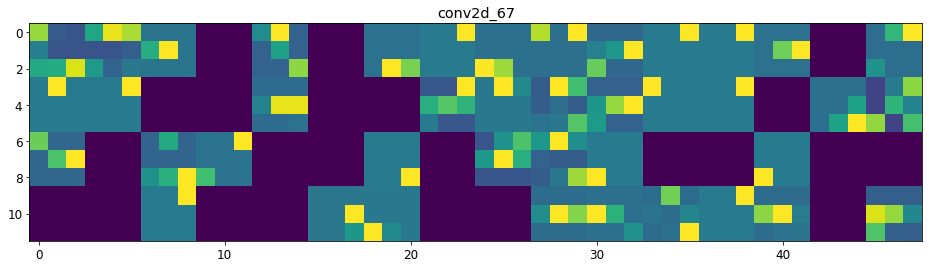

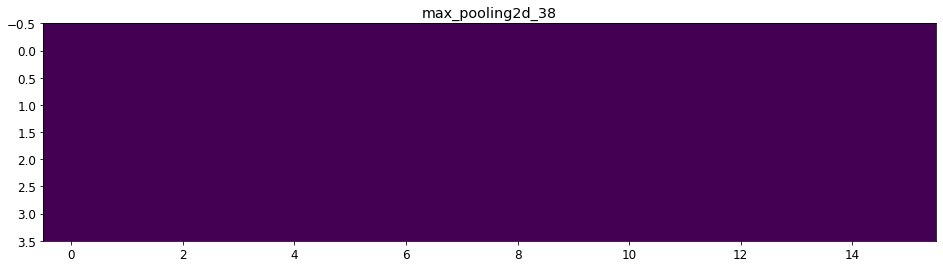

In [103]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): 
    n_features = layer_activation.shape[-1]
    print(n_features)
    size=layer_activation.shape[1]
    print(size)
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [161]:
activations[0].shape,activations[0][0,:, :,1].shape
activations[1].shape,activations[1][0,:, :,1].shape
activations[2].shape,activations[2][0,:, :,1].shape
activations[3].shape,activations[3][0,:, :,1].shape


((1, 5, 5, 16), (5, 5))

In [110]:
def deimg(channel_image):
    channel_image -= channel_image.mean()
    channel_image /= channel_image.std()
    channel_image *= 64
    channel_image += 128
    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
    
    return channel_image

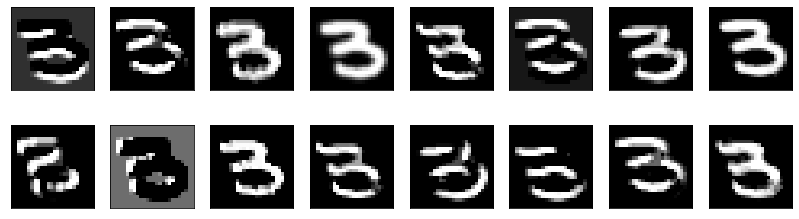

In [166]:
plt.figure(figsize=(14,4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(deimg(activations[0][0,:, :,i]),cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

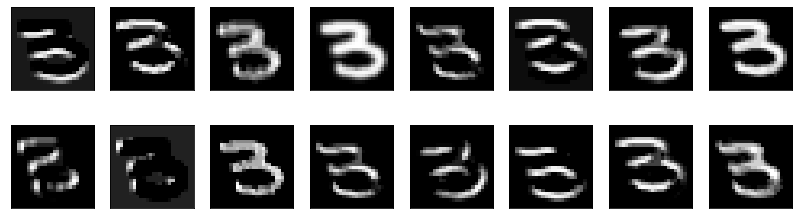

In [168]:
plt.figure(figsize=(14,4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(activations[0][0,:, :,i],cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

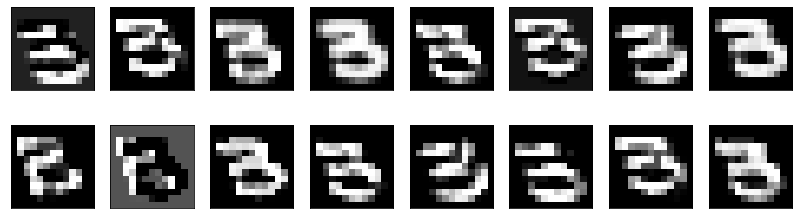

In [153]:
plt.figure(figsize=(14,4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(deimg(activations[1][0,:, :,i]),cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

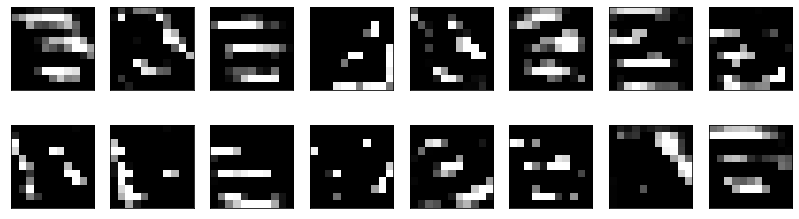

In [155]:
plt.figure(figsize=(14,4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(deimg(activations[2][0,:, :,i]),cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

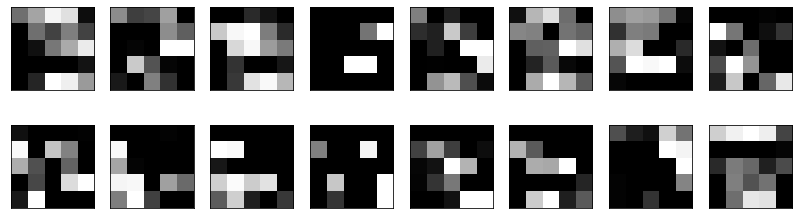

In [158]:
plt.figure(figsize=(14,4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(deimg(activations[3][0,:, :,i]),cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

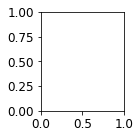

In [159]:
plt.figure(figsize=(14,4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(deimg(activations[4][0,:, :,i]),cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

In [121]:
layer_outputs = [layer.output for layer in cnn2.layers[0:]]
activation_model = Model(inputs=cnn2.input,outputs=layer_outputs)
#activations = activation_model.predict(np.expand_dims(x_test[51,:,:,:], axis=0))

In [124]:
activation_model.predict(np.expand_dims(x_test[51,:,:,:], axis=0))

TypeError: Can not convert a KerasTensor into a Tensor or Operation.

Model: "model_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_70 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                          

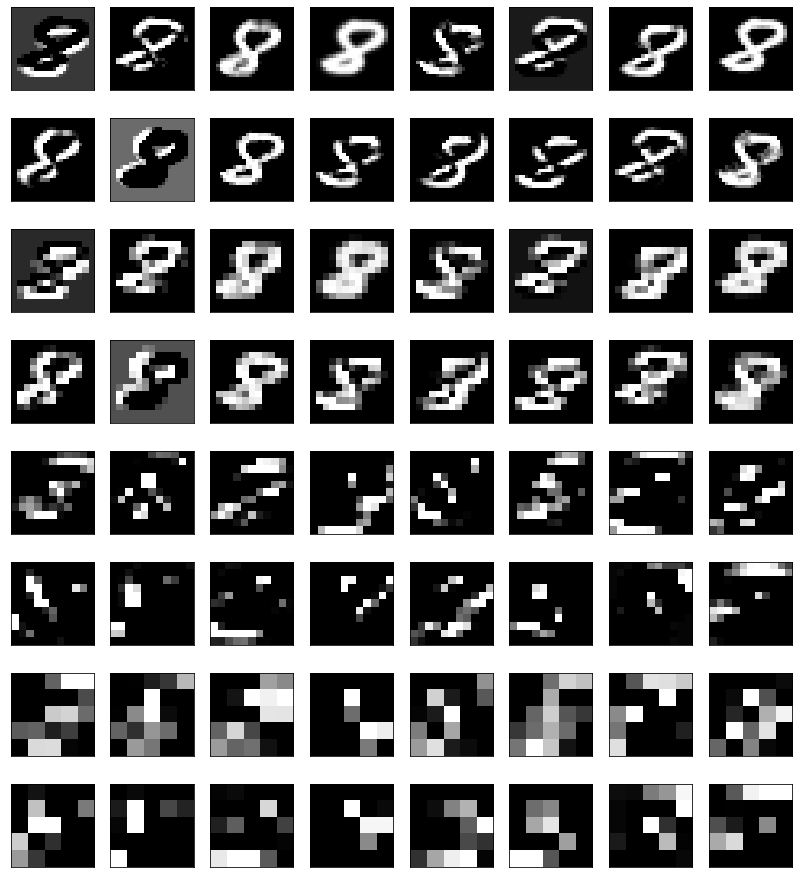

In [180]:
layer_outputs = [layer.output for layer in cnn4.layers[0:5]]
activation_model = Model(inputs=cnn4.input,outputs=layer_outputs)
activations = activation_model.predict(np.expand_dims(x_test[61,:,:,:], axis=0))
activation_model.summary()

plt.figure(figsize=(14,16))

cnt=1
for j in range(4):
    for i in range(16):
        plt.subplot(8,8,cnt)
        plt.imshow(deimg(activations[j][0,:, :,i]),cmap='Greys_r')
        plt.xticks([])
        plt.yticks([])
        cnt+=1
        
plt.savefig('test_8_activation_each_layer_cnn_mnist.png',dpi=350)

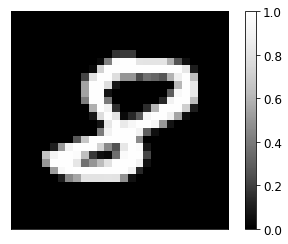

In [181]:
img=x_test[61,:,:,0]
plt.imshow(img,cmap='Greys_r')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.savefig('test_8_cnn_mnist.png',dpi=350)